In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
import warnings
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message=".*FigureCanvasAgg is non-interactive.*"
)
import os
os.environ["NIXTLA_ID_AS_COL"] = "true"
import numpy as np
np.set_printoptions(suppress=True)
np.random.seed(1)
import random
random.seed(1)
import pandas as pd
pd.set_option("max_colwidth", 100)
pd.set_option("display.precision", 3)
from utilsforecast.plotting import plot_series as plot_series_utils
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams.update({
    "figure.figsize": (8, 5),
    "figure.dpi": 100,
    "savefig.dpi": 300,
    "figure.constrained_layout.use": True,
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 9,
    "legend.title_fontsize": 10,
})
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=["#000000", "#000000"])
from fpppy.utils import plot_series

In [42]:
global_economy = pd.read_csv("data/global_economy.csv")

## lets just query for austrlia:

In [43]:
df_australia = global_economy.query('unique_id == "Australia"')["ds", "GDP", "Population"]

KeyError: ('ds', 'GDP', 'Population')

In [44]:
df_australia

,ds,GDP,Population,y
638,1960,1.857e+10,1.028e+07,1807.350
639,1961,1.965e+10,1.048e+07,1874.305
640,1962,1.989e+10,1.074e+07,1851.425
641,1963,2.150e+10,1.095e+07,1963.639
642,1964,2.376e+10,1.117e+07,2127.567
643,1965,2.593e+10,1.139e+07,2277.067
644,1966,2.726e+10,1.165e+07,2339.862
645,1967,3.039e+10,1.180e+07,2575.620
646,1968,3.266e+10,1.201e+07,2719.430
647,1969,3.662e+10,1.226e+07,2986.219


In [45]:
df = global_economy.query('unique_id == "Australia"')[
    ["unique_id", "ds", "GDP", "Population"]
].assign(y=lambda x: x["GDP"] / x["Population"])

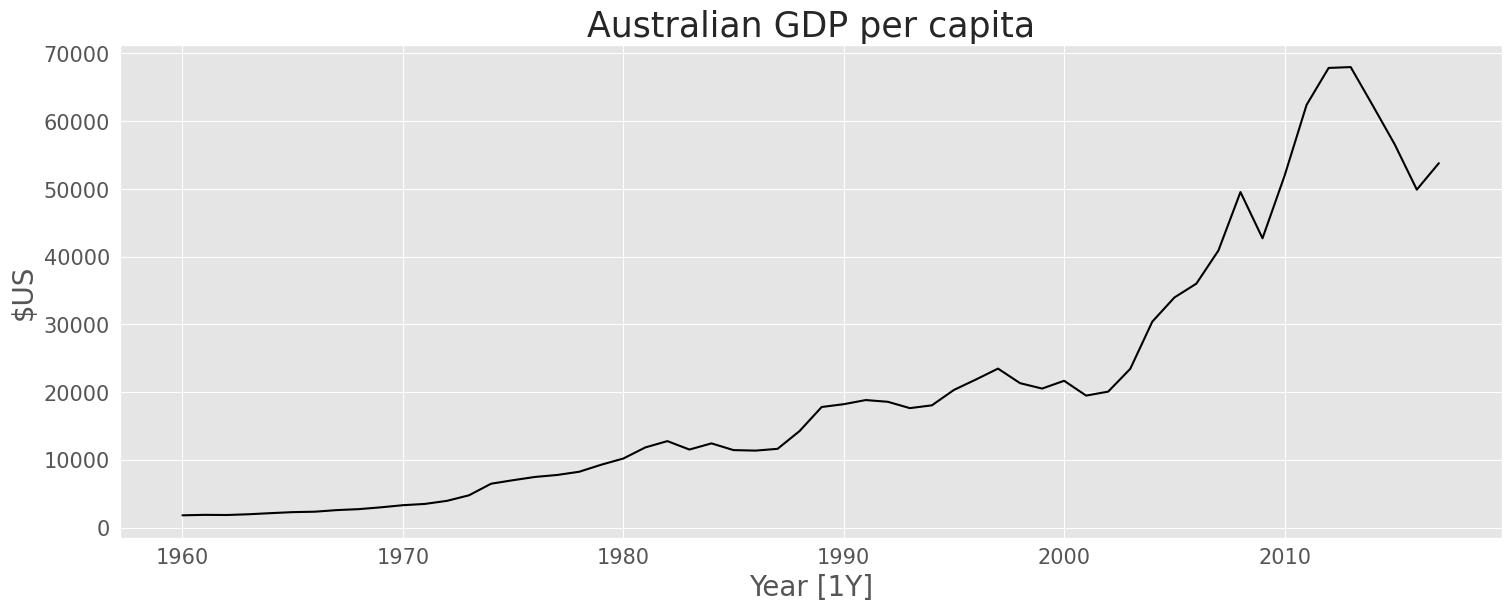

In [46]:
plot_series(df, xlabel="Year [1Y]", ylabel="$US", title="Australian GDP per capita")

## inflation tyime

In [47]:
aus_retail = pd.read_csv("data/aus_retail.csv", parse_dates=["Month"])
aus_retail

,State,Industry,Series ID,Month,Turnover
0,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-04-01,4.4
1,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-05-01,3.4
2,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-06-01,3.6
3,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-07-01,4.0
4,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982-08-01,3.6
...,...,...,...,...,...
64527,Western Australia,Takeaway food services,A3349435A,2018-08-01,178.5
64528,Western Australia,Takeaway food services,A3349435A,2018-09-01,179.8
64529,Western Australia,Takeaway food services,A3349435A,2018-10-01,183.2
64530,Western Australia,Takeaway food services,A3349435A,2018-11-01,183.7


In [48]:
print_retail = (
    aus_retail.query('Industry == "Newspaper and book retailing"')
    .groupby(["Month"], as_index=False)["Turnover"]
    .sum()
)
print_retail["ds"] = print_retail["Month"].dt.year
print_retail = print_retail.groupby("ds")["Turnover"].sum().reset_index()
print_retail

,ds,Turnover
0,1982,1263.0
1,1983,1799.5
2,1984,2011.3
3,1985,2108.7
4,1986,2263.3
5,1987,2533.9
6,1988,2557.4
7,1989,2859.1
8,1990,2891.4
9,1991,2843.3


In [49]:
aus_economy = global_economy.query('unique_id == "Australia"')
aus_economy

,unique_id,Code,ds,GDP,Growth,CPI,Imports,Exports,Population
638,Australia,AUS,1960,1.857e+10,NaN,7.960,14.062,12.994,1.028e+07
639,Australia,AUS,1961,1.965e+10,2.486,8.143,15.025,12.403,1.048e+07
640,Australia,AUS,1962,1.989e+10,1.296,8.117,12.631,13.943,1.074e+07
641,Australia,AUS,1963,2.150e+10,6.214,8.169,13.834,13.006,1.095e+07
642,Australia,AUS,1964,2.376e+10,6.979,8.403,13.764,14.938,1.117e+07
643,Australia,AUS,1965,2.593e+10,5.983,8.689,15.267,13.220,1.139e+07
644,Australia,AUS,1966,2.726e+10,2.382,8.975,15.130,12.932,1.165e+07
645,Australia,AUS,1967,3.039e+10,6.302,9.287,13.893,12.884,1.180e+07
646,Australia,AUS,1968,3.266e+10,5.096,9.521,14.486,12.298,1.201e+07
647,Australia,AUS,1969,3.662e+10,7.044,9.834,13.334,11.955,1.226e+07


In [50]:
df = pd.merge(aus_economy, print_retail, on="ds", how="left")

In [51]:
df["Adjusted_turnover"] = (df["Turnover"] / df["CPI"]) * 100
df.dropna(inplace=True)

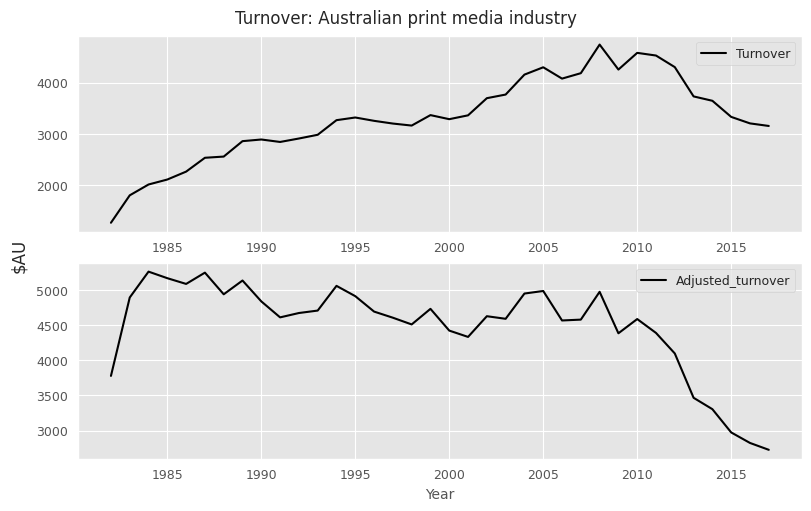

In [52]:

fig, axes = plt.subplots(nrows=2, ncols=1)
sns.lineplot(data=df, x='ds', y='Turnover', ax=axes[0], color='black',
    label="Turnover")
sns.lineplot(data=df, x='ds', y='Adjusted_turnover', ax=axes[1],
    color='black', label="Adjusted_turnover")
axes[0].set_xlabel('')
axes[1].set_xlabel("Year")
axes[0].set_ylabel("")
axes[1].set_ylabel("")
fig.suptitle("Turnover: Australian print media industry")
fig.supylabel("$AU")
plt.show()



In [53]:
df

,unique_id,Code,ds,GDP,Growth,CPI,Imports,Exports,Population,Turnover,Adjusted_turnover
22,Australia,AUS,1982,1.937e+11,3.328,33.429,16.834,13.541,1.518e+07,1263.0,3778.188
23,Australia,AUS,1983,1.770e+11,-2.220,36.785,15.627,13.595,1.537e+07,1799.5,4891.993
24,Australia,AUS,1984,1.932e+11,4.581,38.241,15.009,13.580,1.554e+07,2011.3,5259.481
25,Australia,AUS,1985,1.802e+11,5.249,40.817,17.310,15.260,1.576e+07,2108.7,5166.248
26,Australia,AUS,1986,1.820e+11,4.055,44.511,18.086,15.014,1.602e+07,2263.3,5084.819
27,Australia,AUS,1987,1.890e+11,2.505,48.309,17.094,15.494,1.626e+07,2533.9,5245.187
28,Australia,AUS,1988,2.357e+11,5.681,51.795,16.645,15.984,1.653e+07,2557.4,4937.542
29,Australia,AUS,1989,2.993e+11,3.868,55.697,16.979,15.146,1.681e+07,2859.1,5133.293
30,Australia,AUS,1990,3.108e+11,3.565,59.781,17.070,15.144,1.707e+07,2891.4,4836.615
31,Australia,AUS,1991,3.254e+11,-0.388,61.681,16.192,16.059,1.728e+07,2843.3,4609.720


## Mathetmatical Transformations:
#### Box-Cox Transform:

- $w_i = \log(y_i)$ if $\lambda = 0$
- $(\text{sign}(y_t)|y_t|^\lambda - 1)/\lambda$ otherwise

In [56]:
import calendar
from tsfeatures import *
from statsmodels.tsa.seasonal import STL
from statsforecast import StatsForecast
from coreforecast.scalers import boxcox, boxcox_lambda
from statsmodels.tsa.seasonal import seasonal_decompose

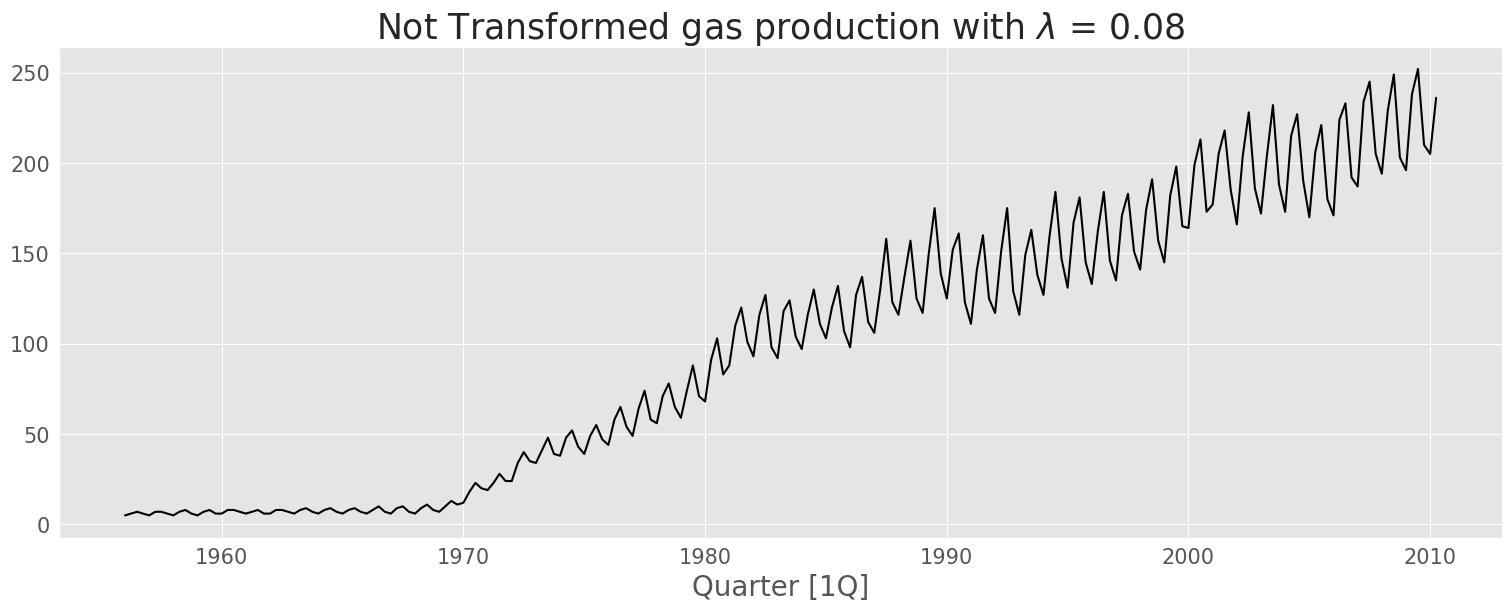

In [64]:
aus_production = pd.read_csv("data/aus_production.csv",
    parse_dates=["ds"])
df = aus_production[["ds", "Gas"]].copy()
df.insert(0, "unique_id", "Gas")
df.rename(columns={"Gas": "y"}, inplace=True)

optim_lambda = boxcox_lambda(df["y"].to_numpy(), method="guerrero",
    season_length=4)
y_transformed = boxcox(df["y"].to_numpy(), optim_lambda)

df["y_transformed"] = y_transformed
rounded_lambda = round(optim_lambda, 2)

plot_series(df, target_col="y",
    xlabel="Quarter [1Q]", ylabel="",
    title=f"Not Transformed gas production with $\\lambda$ = {rounded_lambda}")


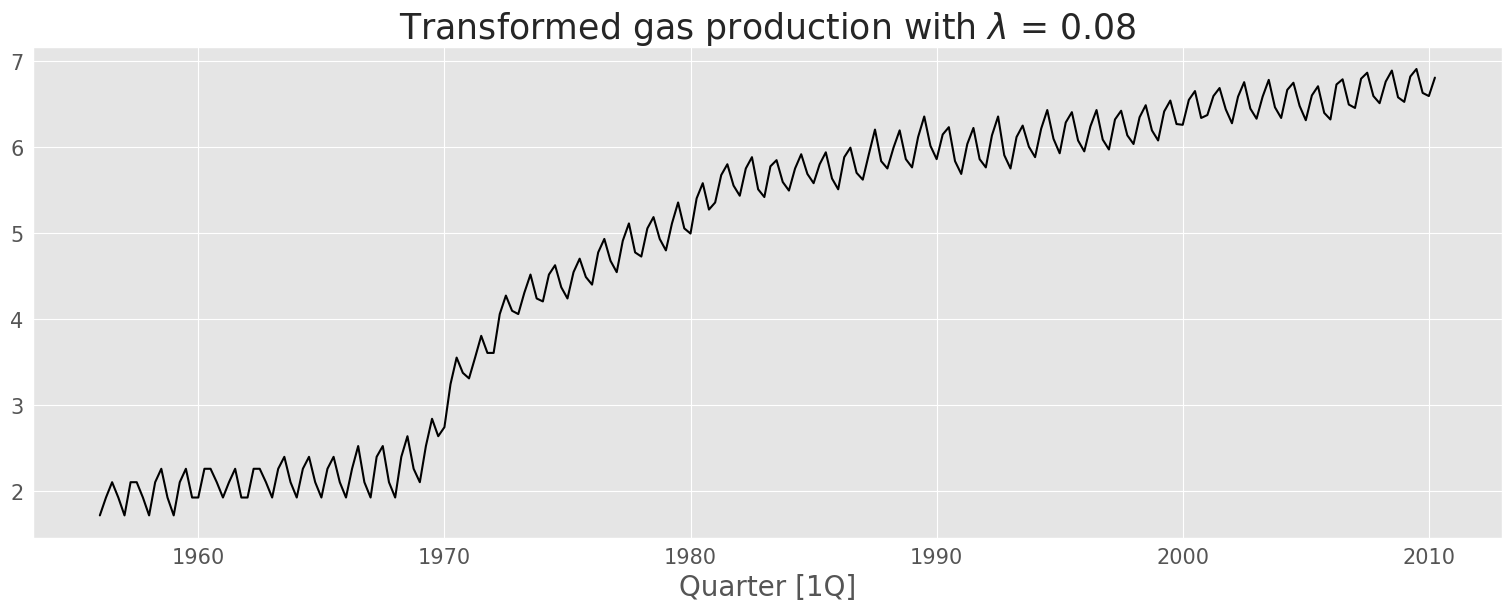

In [65]:

plot_series(df, target_col="y_transformed",
    xlabel="Quarter [1Q]", ylabel="",
    title=f"Transformed gas production with $\\lambda$ = {rounded_lambda}")

## Time Series Copmonents:

For an additive decopmition:

$$y_t = S_t + T_t + R_t$$

where $y_t$ is the data, $S_t$ is the seasonal component, $T_t$ is the trend-cycle component, and $R_t$ is the remainder component, all at period $t$. And for a multiplicative decomposition:

$$y_t = S_t \times T_t \times R_t$$

Or we can do log transform then we can add like:

$$\log(y_t) = \log(S_t) \times \log(T_t) \times \log(R_t)$$

#### Example: employment in the US retail sector:

In [68]:
us_employment = pd.read_csv("data/us_employment.csv", parse_dates=["ds"])
us_retail_employment = us_employment.query(
    '(unique_id == "Retail Trade") & (ds >= "1990-01-01")'
)
us_retail_employment

,ds,unique_id,y
50031,1990-01-01,Retail Trade,13255.8
50032,1990-02-01,Retail Trade,12966.3
50033,1990-03-01,Retail Trade,12938.2
50034,1990-04-01,Retail Trade,13012.3
50035,1990-05-01,Retail Trade,13108.3
...,...,...,...
50383,2019-05-01,Retail Trade,15691.6
50384,2019-06-01,Retail Trade,15775.5
50385,2019-07-01,Retail Trade,15785.9
50386,2019-08-01,Retail Trade,15749.5


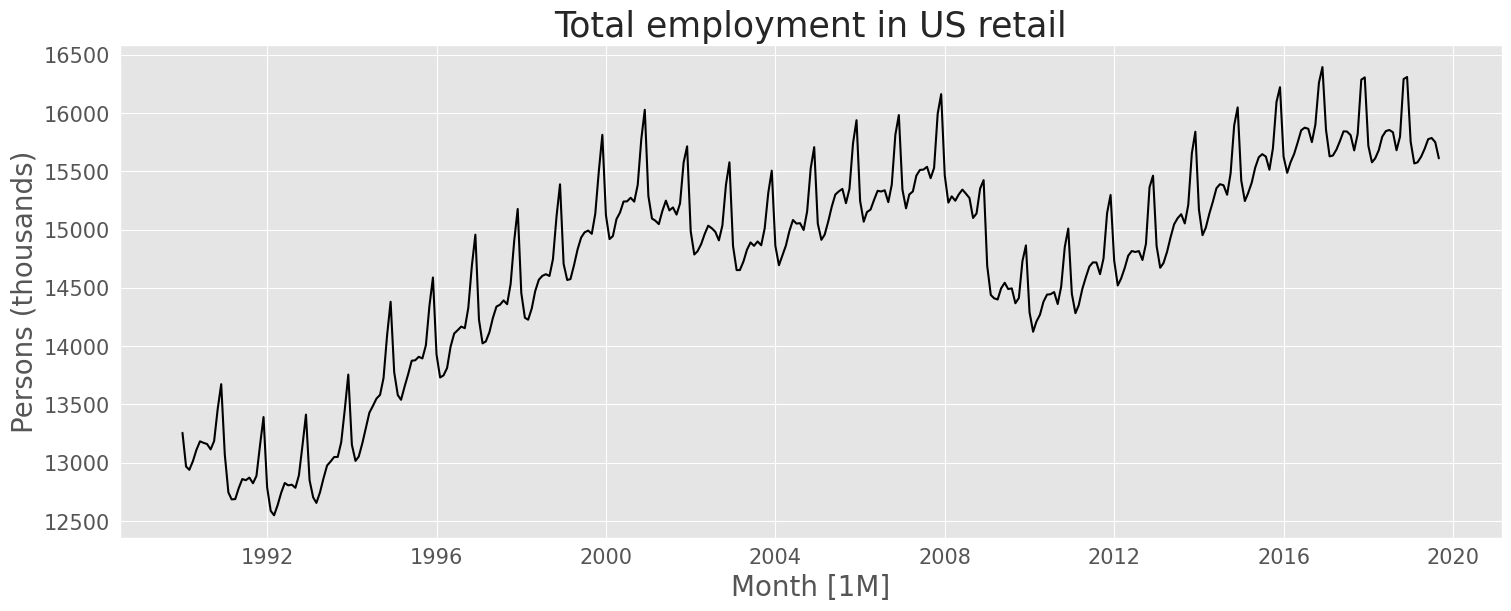

In [69]:


plot_series(us_retail_employment,
            xlabel="Month [1M]",
            ylabel="Persons (thousands)",
            title="Total employment in US retail")

#### STL : Seasonal and Trend Decomposition

In [71]:
stl = STL(us_retail_employment["y"], period=12)
res = stl.fit()
dcmp = pd.DataFrame({
    "ds": us_retail_employment["ds"],
    "data": us_retail_employment["y"],
    "trend": res.trend,
    "seasonal": res.seasonal,
    "remainder": res.resid
}).reset_index(drop=True)

dcmp.head()


,ds,data,trend,seasonal,remainder
0,1990-01-01,13255.8,13296.249,-3.700,-36.749
1,1990-02-01,12966.3,13276.085,-288.398,-21.387
2,1990-03-01,12938.2,13255.663,-306.658,-10.805
3,1990-04-01,13012.3,13234.986,-235.775,13.089
4,1990-05-01,13108.3,13214.071,-115.399,9.628


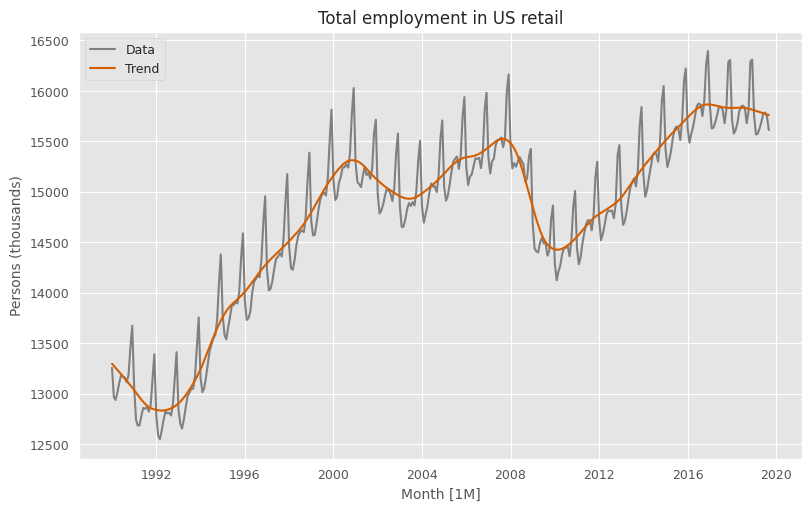

In [72]:
fig, ax = plt.subplots()
sns.lineplot(data=dcmp, x="ds", y="data", label="Data", color="gray")
sns.lineplot(data=dcmp, x="ds", y="trend", label="Trend", color="#D55E00")
ax.set_title("Total employment in US retail")
ax.set_xlabel("Month [1M]")
ax.set_ylabel("Persons (thousands)")
plt.show()

## we can plot all the components of the decomposition:

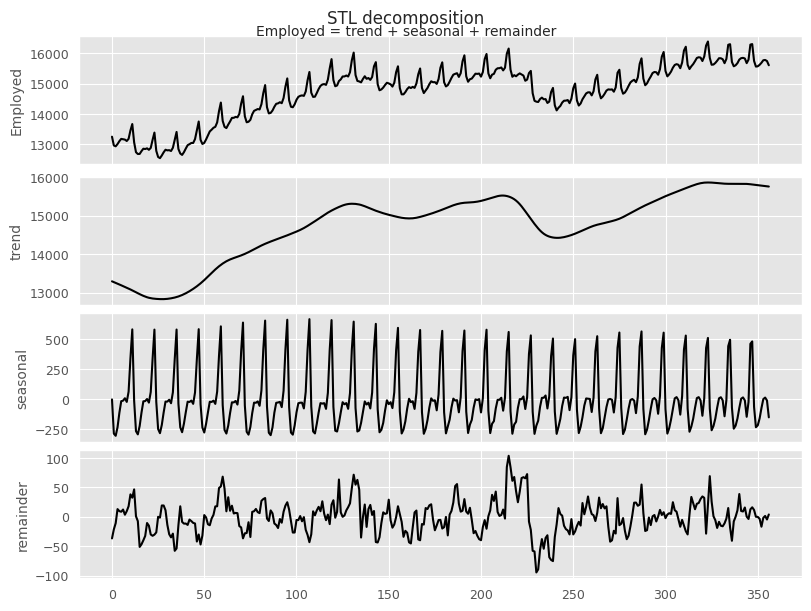

In [73]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(8, 6))
sns.lineplot(data=dcmp, x=dcmp.index, y="data", ax=axes[0])
sns.lineplot(data=dcmp, x=dcmp.index, y="trend", ax=axes[1])
sns.lineplot(data=dcmp, x=dcmp.index, y="seasonal", ax=axes[2])
sns.lineplot(data=dcmp, x=dcmp.index, y="remainder", ax=axes[3])
axes[0].set_ylabel("Employed")
axes[1].set_ylabel("trend")
axes[2].set_ylabel("seasonal")
axes[3].set_ylabel("remainder")
fig.suptitle("STL decomposition")
fig.subplots_adjust(top=0.90)
fig.text(0.5, 0.95, "Employed = trend + seasonal + remainder", ha='center')
plt.xlabel("")
plt.show()
plt.show()

#### Sesonally Adjused Data:

Seasonally adjusted data is given by $y_t - S_t$, nad for multiplicative data, the sasonally adjusted values are obtained using $y_t/S_t$

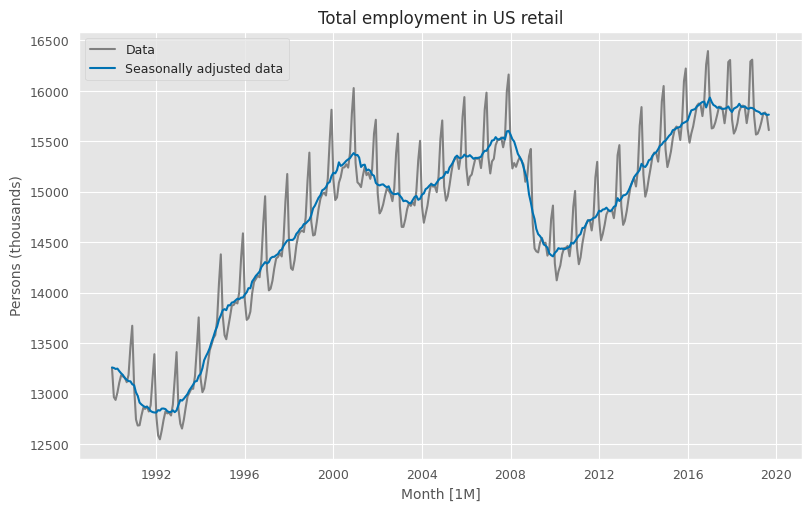

In [74]:
dcmp["season_adjust"] = dcmp["data"] - dcmp["seasonal"]

fig, ax = plt.subplots()
sns.lineplot(data=dcmp, x="ds", y="data", label="Data", color="gray")
sns.lineplot(
    data=dcmp,
    x="ds",
    y="season_adjust",
    label="Seasonally adjusted data",
    color="#0072B2",
)
ax.set_title("Total employment in US retail")
ax.set_xlabel("Month [1M]")
ax.set_ylabel("Persons (thousands)")
plt.show()

#### next is 3.2: Movin Averages